# 00. Table of Contents

01. Notebook Setup

- Import libraries
- Import datasets as dataframes

02. Data cleaning
03. Data prep for regression analysis
04. Regression analysis

# 01. Notebook Setup

## 01.01 Import libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
# Ensure graphs are displayed within the notebook without "calling"" them specifically.

%matplotlib inline

In [3]:
path = '/Users/laineyodette/Documents/_proDocs/professional development/Learning/Learning - Data Analytics/CareerFoundry - Become a Data Analyst/Data Immersion Course/A6 - Advanced Analytics and Dashboard Design/Book Project'


## 01.02 Import datasets as dataframe

In [4]:
df = pd.read_csv(os.path.join(path, '02 Data', 'Dataset', 'ratingsUsers.csv'))

### 2. Data cleaning

In [5]:
df.columns

Index(['Unnamed: 0', 'User-ID', 'ISBN', 'Book-Rating', 'Age', 'Location',
       'Country', 'Original Country', 'Age Category', 'Rating Category'],
      dtype='object')

In [6]:
df.head(20)

,Unnamed: 0,User-ID,ISBN,Book-Rating,Age,Location,Country,Original Country,Age Category,Rating Category
0,0,276726,0155061224,5,22,"seattle, washington, usa",United States of America,usa,Young,Mid Rating
1,1,276729,052165615X,3,16,"rijeka, n/a, croatia",Croatia,croatia,Young,Low Rating
2,2,276729,0521795028,6,16,"rijeka, n/a, croatia",Croatia,croatia,Young,Mid Rating
3,3,276736,3257224281,8,27,"salzburg, salzburg, austria",Austria,austria,Adult,High Rating
4,4,276737,0600570967,6,14,"sydney, new south wales, australia",Australia,australia,Young,Mid Rating
5,5,276744,038550120X,7,55,"torrance, california, usa",United States of America,usa,Older,Mid Rating
6,6,276745,342310538,10,27,"berlin, berlin, germany",Germany,germany,Adult,High Rating
7,7,276747,0060517794,9,25,"iowa city, iowa, usa",United States of America,usa,Young,High Rating
8,8,276747,0671537458,9,25,"iowa city, iowa, usa",United States of America,usa,Young,High Rating
9,9,276747,0679776818,8,25,"iowa city, iowa, usa",United States of America,usa,Young,High Rating


In [7]:
df.shape

(409283, 10)

##### Missing values

In [8]:
# Check for missing values

df.isnull().sum()

Unnamed: 0          0
User-ID             0
ISBN                0
Book-Rating         0
Age                 0
Location            0
Country             0
Original Country    0
Age Category        0
Rating Category     0
dtype: int64

##### Duplicates check

In [9]:
# Find any duplicate values in df through a subset

df_dups = df[df.duplicated()]
df_dups

,Unnamed: 0,User-ID,ISBN,Book-Rating,Age,Location,Country,Original Country,Age Category,Rating Category


In [10]:
# No duplicates found

##### Extreme values checks

/var/folders/yg/0kmnml152y57r36vt3dk72680000gn/T/ipykernel_22626/596618421.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Book-Rating'], bins=25)
/Users/laineyodette/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Book-Rating', ylabel='Density'>

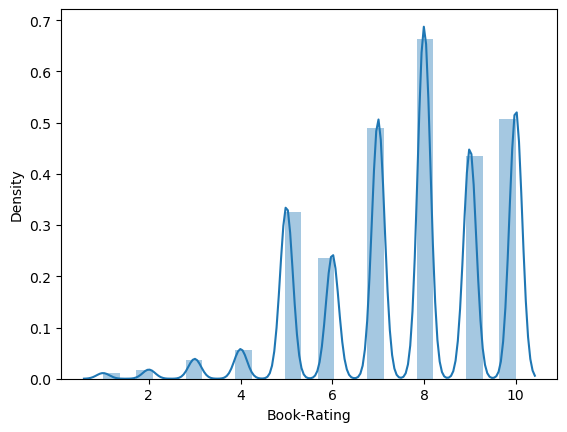

In [11]:
# Shows extreme values

sns.distplot(df['Book-Rating'], bins=25) 


In [12]:
# Check the mean

df['Book-Rating'].mean() 


7.613350664454669

In [13]:
# Check the median

df['Book-Rating'].median() 


8.0

In [14]:
# Check the max

df['Book-Rating'].max() 


10

In [15]:
# No extremes found (should only be between 1-10 and they are)

### 3. Data prep for regression analysis 

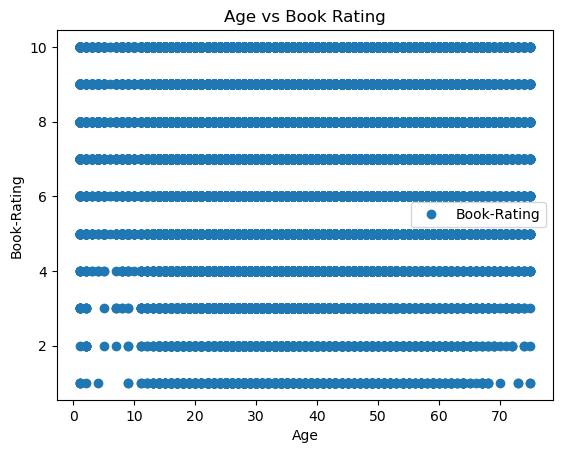

In [16]:
# Create a scatterplot using matplotlib for another look at how the chosen variables plot against each other.

df.plot(x = 'Age', y='Book-Rating',style='o')
plt.title('Age vs Book Rating')  
plt.xlabel('Age')  
plt.ylabel('Book-Rating')  
plt.show()

In [17]:
# Reshape the variables into NumPy arrays / put them into separate objects.

X = df['Age'].values.reshape(-1,1)
y = df['Book-Rating'].values.reshape(-1,1)


In [18]:
X

array([[22],
       [16],
       [16],
       ...,
       [38],
       [14],
       [12]])

In [19]:
y

array([[ 5],
       [ 3],
       [ 6],
       ...,
       [10],
       [10],
       [ 8]])

In [20]:
# Split data into a training set and a test set.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)


### 4. Regression analysis

In [21]:
# Create a regression object.

regression = LinearRegression()  


In [22]:
# Fit the regression object onto the training set.

regression.fit(X_train, y_train)


LinearRegression()

In [23]:
# Predict the values of y using X.

y_predicted = regression.predict(X_test)


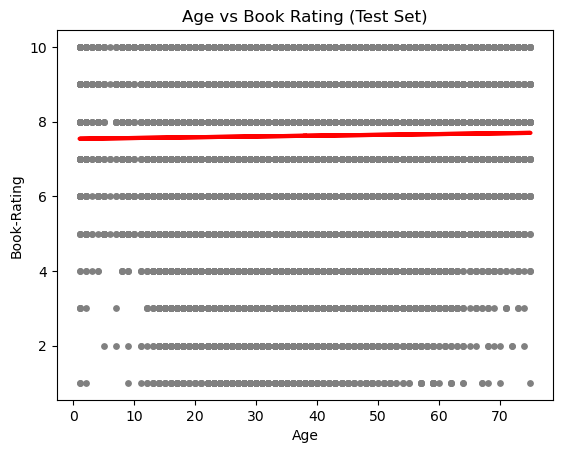

In [24]:
# Create a plot that shows the regression line from the model on the test set.

plot_test = plt
plot_test.scatter(X_test, y_test, color='gray', s = 15)
plot_test.plot(X_test, y_predicted, color='red', linewidth =3)
plot_test.title('Age vs Book Rating (Test Set)')
plot_test.xlabel('Age')
plot_test.ylabel('Book-Rating')
plot_test.show()


**Obervation**

There are a LOT of points nowhere near the line. This may not be the best model for prediction.

In [25]:
# Create objects that contain the model summary statistics.

rmse = mean_squared_error(y_test, y_predicted) 
r2 = r2_score(y_test, y_predicted) 


In [26]:
# Print the model summary statistics to evaluate the performance of the model.

print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)


Slope: [[0.00211182]]
Mean squared error:  3.3944597848004543
R2 score:  0.00031642002950771353


**Obervation**

MSE is relatively low, indicating accuracy because the regression line passes fairly close to the observations, making it a good fit. Even though that's not what the visual shows.
R2 score is really really low, so not looking like a great fit.

In [27]:
y_predicted

array([[7.61934046],
       [7.6636887 ],
       [7.61934046],
       ...,
       [7.5939986 ],
       [7.63834685],
       [7.61934046]])

In [28]:
# Create a dataframe comparing the actual and predicted values of y.

data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
data.head(30)

,Actual,Predicted
0,7,7.619340
1,6,7.663689
2,7,7.619340
3,10,7.629900
4,10,7.579216
5,7,7.610893
6,9,7.621452
7,5,7.606670
8,9,7.638347
9,3,7.572880


**Observation**

Predicted and actual values not very close.

##### Compare how the regression fits the training set

In [29]:
# Predict.

y_predicted_train = regression.predict(X_train) # This is predicting X_train!

In [30]:
rmse = mean_squared_error(y_train, y_predicted_train)
r2 = r2_score(y_train, y_predicted_train)

In [31]:
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[0.00211182]]
Mean squared error:  3.3694667499020365
R2 score:  0.00020607048086329627


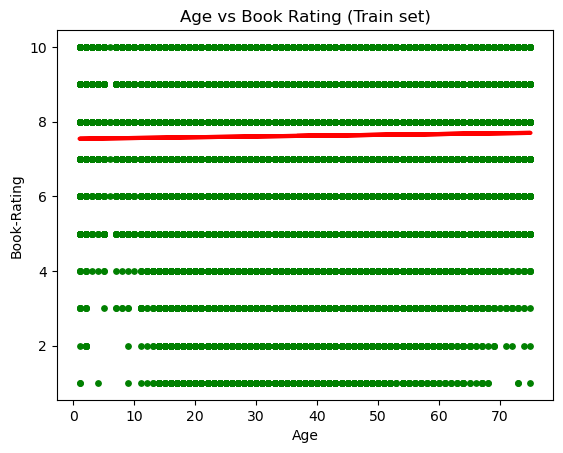

In [32]:
# Visualizing the training set results.

plot_test = plt
plot_test.scatter(X_train, y_train, color='green', s = 15)
plot_test.plot(X_train, y_predicted_train, color='red', linewidth =3)
plot_test.title('Age vs Book Rating (Train set)')
plot_test.xlabel('Age')
plot_test.ylabel('Book-Rating')
plot_test.show()

**Observation**

The MSE is still low, the R2 score is incredibly low... (indicating test and training results are similar). But they are still indicating overall not a great fit. 